## MACHINE LEARNING PROJECT

This project works on tele-customers data. It contains different attributes such as age,income, gender etc based on which the customers are classified into four categories.
The aim of the project is to classify tele-customers using different machine learning classifiers and analyzing their performance.

## Importing data

In [114]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
    

--2020-04-05 12:04:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.07s   

2020-04-05 12:04:36 (487 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



Since tele-customers data is in the form of csv file. Let us first import pandas library and numpy library to analyze the input data

In [115]:
import numpy as np
import pandas as pd

Reading data :

In [116]:
data=pd.read_csv('teleCust1000t.csv')

In [117]:
data.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


We shall begin with understanding the data and preprocessing if required.
Let us comprehend the input data- it's size, columns and data types

## Preprocessing

In [118]:
data.shape

(1000, 12)

In [119]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


In [120]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

As we want to categorize data into different categories. We consider 'custcat' as the predictor or dependent variable

In [121]:
y=data['custcat']


The other columns such as 'region', 'tenure', 'age'..... are the independent variables stored as x


In [122]:
from sklearn import preprocessing
x=data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x[:6]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
5,2,41,39,0,17,78.0,2,16,0.0,1,1


Since data stored in each column has different ranges, let us normalize them to [0,1]. 
Here we are using the StandardScalar function 

In [123]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [124]:
x[:6]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -0.54919639,  0.49746728, -0.22207644,  0.96655883,
        -0.927

After normalizing the data, we need to split it into two parts: training data and testing data
Training Data: The data used by the Machine Learning Model to learn the underlying patterns. 
Usually we classify 25% of input data as test-data and 75% as training data.
The train-test-split function from sklearn's model_selection is used for this purpose.
It returns 4 parts: x-train,y-train, x-test, y-test

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [126]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(750, 11) (750,) (250, 11) (250,)


## Modelling

## 1) K NEAREST NEIGHBORS CLASSIFIER

In [127]:
from sklearn.neighbors import KNeighborsClassifier
k=4
model=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [128]:
accuracy={}

Using KNN Classifier to predict test data

In [129]:
y_pred=model.predict(x_test)

In [130]:
y_pred

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 4, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 3, 4, 2, 1,
       4, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 1, 1, 1, 4, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 4, 1, 2, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3, 4, 4, 1, 3, 1, 3, 1, 1, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 2, 1, 4, 4, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1,
       4, 3, 2, 2, 4, 2, 1, 4, 4, 1, 4, 3, 1, 2, 2, 2, 1, 2, 4, 1, 3, 4,
       4, 4, 3, 3, 4, 1, 2, 2])

TO evaluate the classifier we are using accuracy score:


In [131]:
from sklearn import metrics
train_accuracy=metrics.accuracy_score(y_train,model.predict(x_train))

In [132]:
test_accuracy=metrics.accuracy_score(y_test,y_pred)

In [133]:
print("Accuracy for train data:",train_accuracy)
print("Accuracy for test data:",test_accuracy)

Accuracy for train data: 0.5413333333333333
Accuracy for test data: 0.332


Let us now apply the same classifier for different values of k. Here k value ranges from 1-10. And then  estimating the value of k for which accuracy is maximum

In [134]:
k_values=10
acc=np.zeros(k_values)
for i in range(1,k_values+1):
    model=KNeighborsClassifier(n_neighbors=i).fit(
        x_train,y_train)
    y_pred=model.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
acc

array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356,
       0.344])

Text(0.5, 1.0, 'K Nearest Neighbours Classifier Accuracy')

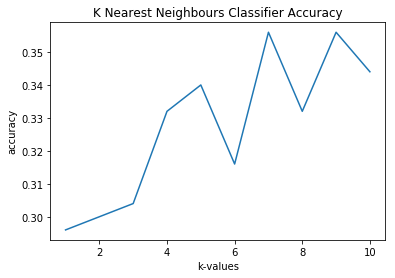

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(1,11,1),acc[:])
plt.xlabel("k-values")
plt.ylabel("accuracy")
plt.title("K Nearest Neighbours Classifier Accuracy")

In [136]:
print("The maximum accuracy obtained using KNN Classifier is ",acc.max()," for k value = ",acc.argmax()+1)

The maximum accuracy obtained using KNN Classifier is  0.356  for k value =  7


In [138]:
accuracy['KNN']=acc.max()

## 2) DECISION TREE CLASSIFIER

Now, let us try to predict customer category using Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
# here we are randomly choosing the max_depth of the tree to be 4
tree_model.fit(x_train,y_train)
y_pred=tree_model.predict(x_test)

In [140]:
print("Accuracy of decision tree = ",metrics.accuracy_score(y_test,y_pred))

Accuracy of decision tree =  0.328


Let us now predict accuracy of decision tree for different depths:

In [141]:
depths=8
accs=np.zeros(depths)
for i in range(1,depths+1):
    tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    tree_model.fit(x_train,y_train)
    y_pred=tree_model.predict(x_test)
    accs[i-1]=(metrics.accuracy_score(y_test,y_pred))
    print("Accuracy of decision tree for max_depth = ",i,"= ",accs[i-1])

Accuracy of decision tree for max_depth =  1 =  0.388
Accuracy of decision tree for max_depth =  2 =  0.424
Accuracy of decision tree for max_depth =  3 =  0.364
Accuracy of decision tree for max_depth =  4 =  0.328
Accuracy of decision tree for max_depth =  5 =  0.332
Accuracy of decision tree for max_depth =  6 =  0.32
Accuracy of decision tree for max_depth =  7 =  0.324
Accuracy of decision tree for max_depth =  8 =  0.316


Text(0.5, 1.0, 'Decision Tree Classifier Accuracy')

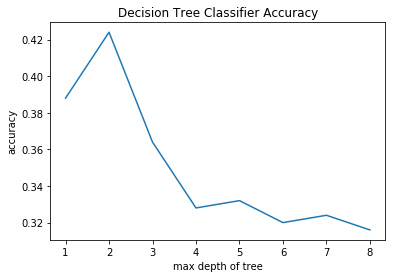

In [142]:
plt.plot(np.arange(1,depths+1,1),accs[:])
plt.xlabel("max depth of tree")
plt.ylabel("accuracy")
plt.title("Decision Tree Classifier Accuracy")

In [143]:
print("The maximum accuracy obtained using Decision Tree Classifier is ",accs.max()," for max_depth = ",accs.argmax()+1)

The maximum accuracy obtained using Decision Tree Classifier is  0.424  for max_depth =  2


In [144]:
accuracy['DT']=accs.max()


## 3) SUPPORT VECTOR MACHINES


Support Vector Machines are supervised learning models commonly used for classification. 

In [145]:
from sklearn import svm


SVM classifiers are defined on different kernels. Here we are using 'Radial Basis Function' (RBF) Kernel

In [146]:
svm_model=svm.SVC(kernel="rbf")
svm_model.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [147]:
y_pred=svm_model.predict(x_test)

The performance of SVM can be analyzed using Confusion Matrix or F1-score or Jaccard Score

In [148]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred,labels=[2,4])

In [149]:
c_matrix

array([[14, 16],
       [18, 17]])

In [150]:
from sklearn.metrics import f1_score,jaccard_similarity_score

In [151]:
f1_score(y_test,y_pred,average="weighted")

0.37662825652099036

In [152]:
jaccard_similarity_score(y_test,y_pred)

0.388

In [153]:
accuracy['SVM']=jaccard_similarity_score(y_test,y_pred)

## 4) LOGISTIC REGRESSION

Logistic regression is another technique borrowed by machine learning from the field of statistics. It is used when the predictor variables are categorical. Let us use it to predict our customer-category

In [154]:
from sklearn.linear_model import LogisticRegression


In [155]:
LR_ll=LogisticRegression(C =0.01,solver="liblinear")

Here the value 'C' refers to the inverse of regularization strength. It must be a positive float value.
solver can be 'newton-cg', 'lbfgs', 'liblinear', 'saga' etc.

In [156]:
LR_ll.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [157]:
y_pred=LR_ll.predict(x_test)

In [158]:
metrics.accuracy_score(y_test,y_pred)

0.408

In [159]:
y_pred_proba=LR_ll.predict_proba(x_test)

predict_proba function is used to predict the probability of a customer belonging to a category (here 1/2/3/4)

In [160]:
y_pred_proba

array([[0.29275433, 0.18908378, 0.28635574, 0.23180615],
       [0.38079545, 0.17018773, 0.26463254, 0.18438428],
       [0.23131557, 0.24437115, 0.19714575, 0.32716753],
       [0.26669291, 0.23393473, 0.1828532 , 0.31651916],
       [0.15517714, 0.29938354, 0.16343463, 0.38200468],
       [0.11677928, 0.2844709 , 0.28437124, 0.31437858],
       [0.20070022, 0.21029194, 0.40555527, 0.18345257],
       [0.29392713, 0.23712639, 0.1512647 , 0.31768179],
       [0.18052604, 0.27261372, 0.32811951, 0.21874073],
       [0.1717593 , 0.30826957, 0.23820104, 0.28177009],
       [0.29791229, 0.22642453, 0.19972916, 0.27593402],
       [0.21400516, 0.28821374, 0.24892879, 0.24885231],
       [0.14924856, 0.2387383 , 0.32315603, 0.28885711],
       [0.31994411, 0.22423759, 0.26763316, 0.18818514],
       [0.23325213, 0.21535112, 0.27047224, 0.28092451],
       [0.44246125, 0.15905852, 0.24004978, 0.15843045],
       [0.14320456, 0.33578275, 0.20821418, 0.31279851],
       [0.14832602, 0.33839428,

In [161]:
accuracy['LR']=jaccard_similarity_score(y_test,y_pred)


In [162]:
from sklearn.metrics import log_loss

In [163]:
np.asarray(y_test)


array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 2, 3, 4, 1, 1,
       1, 3, 4, 4, 4, 2, 4, 3, 1, 1, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 1, 1,
       2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 3, 1, 4, 1, 2, 3, 3, 3, 1,
       4, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 4, 1, 4, 3, 4, 4, 2, 1, 3, 4,
       4, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 2, 1,
       3, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 1, 4, 3, 2, 2, 3, 4, 4, 4, 2,
       2, 3, 1, 2, 4, 3, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 2, 4, 2, 4, 2,
       2, 3, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 4, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 3, 4, 4, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 2, 4, 4, 3, 1, 1, 3, 1,
       4, 4, 4, 2, 1, 1, 1, 1, 3, 3, 2, 3, 2, 4, 4, 4, 3, 4, 3, 4, 3, 4,
       3, 2, 3, 3, 2, 2, 3, 4])

In [164]:
y_pred


array([1, 1, 4, 4, 4, 4, 3, 4, 3, 2, 1, 2, 3, 1, 4, 1, 2, 2, 3, 4, 3, 1,
       1, 1, 4, 4, 1, 1, 1, 1, 3, 1, 4, 3, 1, 2, 3, 3, 4, 4, 3, 4, 3, 1,
       4, 4, 3, 1, 4, 4, 3, 1, 4, 3, 3, 1, 4, 1, 1, 1, 1, 4, 4, 3, 3, 3,
       4, 3, 4, 4, 1, 3, 2, 3, 1, 4, 1, 2, 4, 2, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 1, 1, 4, 1, 2, 4, 3, 4, 4, 1, 1, 3, 1, 1, 1, 1, 4, 3, 2, 2, 1,
       4, 3, 2, 4, 1, 3, 3, 3, 2, 1, 1, 1, 2, 3, 3, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 3, 4, 1, 1, 3, 4, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 4, 2, 4,
       2, 3, 3, 3, 1, 2, 4, 3, 1, 1, 1, 4, 1, 1, 3, 1, 3, 4, 2, 3, 4, 3,
       3, 4, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 4, 1, 3, 4, 3, 1,
       3, 1, 4, 3, 1, 1, 4, 1, 3, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       4, 3, 3, 4, 1, 1, 1, 1, 2, 3, 4, 2, 1, 1, 2, 2, 1, 2, 2, 4, 3, 4,
       4, 3, 4, 3, 4, 1, 2, 3])

In [165]:
log_loss(np.asarray(y_test),y_pred_proba)

1.26708666397565

In [166]:
accuracy

{'KNN': 0.356, 'DT': 0.424, 'SVM': 0.388, 'LR': 0.408}

In [167]:
max(accuracy,key=accuracy.get)
    

'DT'

Text(0.5, 1.0, 'ESTIMATING ACCURACY IN PREDICTING CUSTOMER CATEGORY BY DIFFERENT CLASSIFIERS')

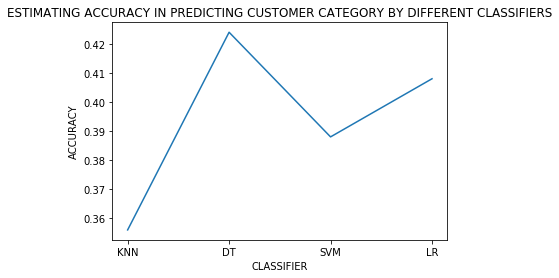

In [170]:
plt.plot(accuracy.keys(),accuracy.values())
plt.xlabel('CLASSIFIER')
plt.ylabel('ACCURACY')
plt.title('ESTIMATING ACCURACY IN PREDICTING CUSTOMER CATEGORY BY DIFFERENT CLASSIFIERS')